**Deep Learning**

HW2 - Problem 2 -International Matches (100 pts)


Full Name: **Nima Kelidari**

Student Number: **98108124**


# **(آ) بارگذاری داده ها در پایتون**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Deep_learning/HW2/Data/

/content/gdrive/MyDrive/Deep_learning/HW2/Data


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
matches = pd.read_csv('./HW2_data/international_matches.csv')
matches.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


# **(ب) رسم نقشه پراکندگی داده ها**

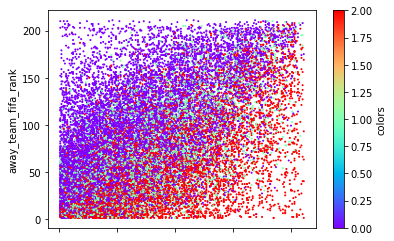

In [7]:
colors = {'Win': 0, 'Draw': 1,'Lose': 2}
matches["colors"] = matches["home_team_result"].map(colors)

matches.plot.scatter(x = 'home_team_fifa_rank', y = 'away_team_fifa_rank',s=1 ,c = 'colors',colormap='rainbow',)

# **ج) ﻣﺮﺗﺐ ﺳﺎﺯﯼ ﺩﺍﺩﻩ ﻫﺎ)**

In [8]:
matches_nonan = matches.dropna().reset_index(drop=True)


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(matches_nonan, test_size=0.25)

In [11]:
train = train.reset_index(drop=True)

In [12]:
test = test.reset_index(drop=True)

# **(د) نمایش همبستگی ویژگی ها**

علاوه بر ویژگی های خواسته شده، من تعدادی ویژگی تاثیر گذار دیگر نیز در کنار آنها برای نتیجه کامل تر و بهتر قرار داده ام. (تعداد زیای از امتیازات فیفا خالی بودند و بر همین اساس از آن استفاده نشد)

In [13]:
x_train = pd.DataFrame().assign(home_team_fifa_rank=train['home_team_fifa_rank'],
                                      home_team_goalkeeper_score=train['home_team_goalkeeper_score'],
                                      home_team_mean_defence_score=train['home_team_mean_defense_score'],
                                      home_team_mean_offence_score=train['home_team_mean_offense_score'],
                                      home_team_mean_midfield_score=train['home_team_mean_midfield_score'],
                                      away_team_fifa_rank=train['away_team_fifa_rank'],
                                      away_team_goalkeeper_score=train['away_team_goalkeeper_score'],
                                      away_team_mean_defence_score=train['away_team_mean_defense_score'],
                                      away_team_mean_offence_score=train['away_team_mean_offense_score'],
                                      away_team_mean_midfield_score=train['away_team_mean_midfield_score'])


In [14]:
x_test = pd.DataFrame().assign(home_team_fifa_rank=test['home_team_fifa_rank'],
                                      home_team_goalkeeper_score=test['home_team_goalkeeper_score'],
                                      home_team_mean_defence_score=test['home_team_mean_defense_score'],
                                      home_team_mean_offence_score=test['home_team_mean_offense_score'],
                                      home_team_mean_midfield_score=test['home_team_mean_midfield_score'],
                                      away_team_fifa_rank=test['away_team_fifa_rank'],
                                      away_team_goalkeeper_score=test['away_team_goalkeeper_score'],
                                      away_team_mean_defence_score=test['away_team_mean_defense_score'],
                                      away_team_mean_offence_score=test['away_team_mean_offense_score'],
                                      away_team_mean_midfield_score=test['away_team_mean_midfield_score'])

In [15]:
colors = {'Win': 0, 'Draw': 0.5,'Lose': 1}
train["result"] = train["home_team_result"].map(colors)
test["result"] = test["home_team_result"].map(colors)

Text(0.5, 1.0, 'Correlation Heatmap')

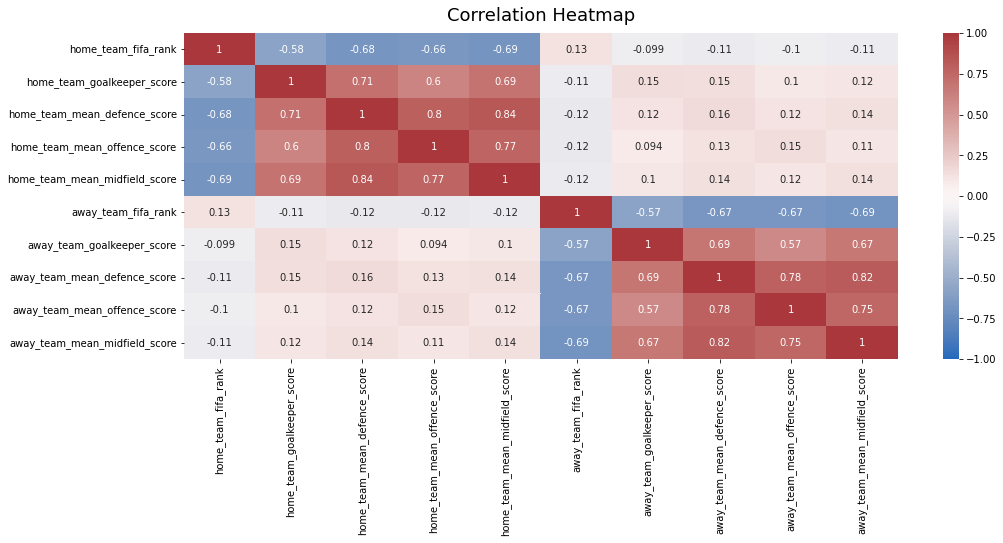

In [16]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(x_train.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# **(ه) طراحی معماری شبکه**

In [17]:

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class NeuralNetwork(nn.Module):
    def __init__(self,features):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.features = features
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(self.features, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid(),
        )
        #self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        #logits = self.dropout(logits)
        return logits

In [18]:
model = NeuralNetwork(features=10)

In [19]:
learning_rate = 0.01
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len

In [22]:
num_epochs = 2000
loss_values = []
batch_size = 32
train_data = Data(x_train.to_numpy(), train['result'].to_numpy())
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_data = Data(x_test.to_numpy(), test['result'].to_numpy())
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)
from tqdm import tqdm
for epoch in tqdm(range(num_epochs)):
    loss_for_epoch = []
    for X, y in train_dataloader:
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_for_epoch.append(loss.item())
        loss.backward()
        optimizer.step()
    loss_values.append(sum(loss_for_epoch) / len(loss_for_epoch))

y_pred = list(pred.detach().numpy())
print("Training Complete")

100%|██████████| 2000/2000 [03:14<00:00, 10.31it/s]

Training Complete


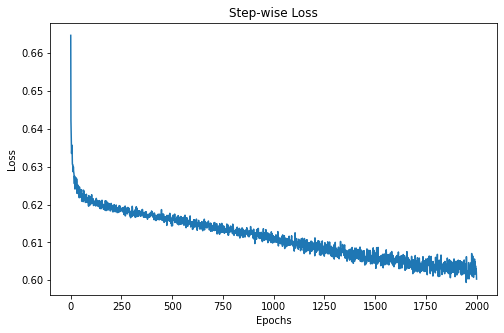

In [23]:
step = np.linspace(0, 2000, 2000)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# **(و) ﺗﺴﺖ ﮐﺮﺩﻥ ﻣﺪﻝ**

در این بلاک کد، کاری که انجام شده این است که بهترین حد ممکن برای آستانه ای که مرز برد یک تیم و مساوی آن هارا نشان میدهد بدست آمده است. در شبکه با لایه های بیشتر و ورودی های بیشتر، میتوانستیم به عنوان یک ورودی جدید در لایه های آخر این  مقدار را به عنوان پیشفرض 0.5 قرار دهیم که در حین فرایند یادگیری، این مقدار آستانه به روش اصولی تر بدست می آمد. 

در اینجا برای مثال مقدار بهینه 0.44 بدست آمده که ما در تست میگوییم اگر نتیجه کوچک تر از 0.44 بود، یعنی تیم اول میبرد، بین 0.44 تا 0.56 یعنی مساوی شده و 0.56 تا 1 یعنی تیم دوم برنده میشود.

In [32]:
import itertools
y_test = list(test['result'].to_numpy())
percents = []
treashhold = []
max_accuracy = 0
max_arg = 0
with torch.no_grad():
  for t in tqdm(range (51)):
      total=0
      correct = 0
      for X, y in test_dataloader:
          #print (X)
          outputs = model(X).numpy()
          outputs[outputs<(t/100)]=0
          outputs[outputs>(1 - t/100)]=1
          outputs[(outputs>=(t/100))&(outputs<=(1 - t/100))]=0.5
          predicted = list(itertools.chain(*outputs))
          y_pred.append(predicted)
          y_test.append(y)
          total += y.size(0)
          correct += (predicted == y.numpy()).sum().item()
          percents.append(100*correct / total)
          treashhold.append(t/100)
          if (100*correct / total)>max_accuracy:
            max_accuracy = 100*correct / total
            max_arg = t/100

print(f'Accuracy of the network on the 3300 test instances: {max_accuracy}%')
print('Best Threashhold: ',max_arg)


100%|██████████| 51/51 [00:00<00:00, 59.42it/s]

Accuracy of the network on the 3300 test instances: 62.5%
Best Threashhold:  0.44


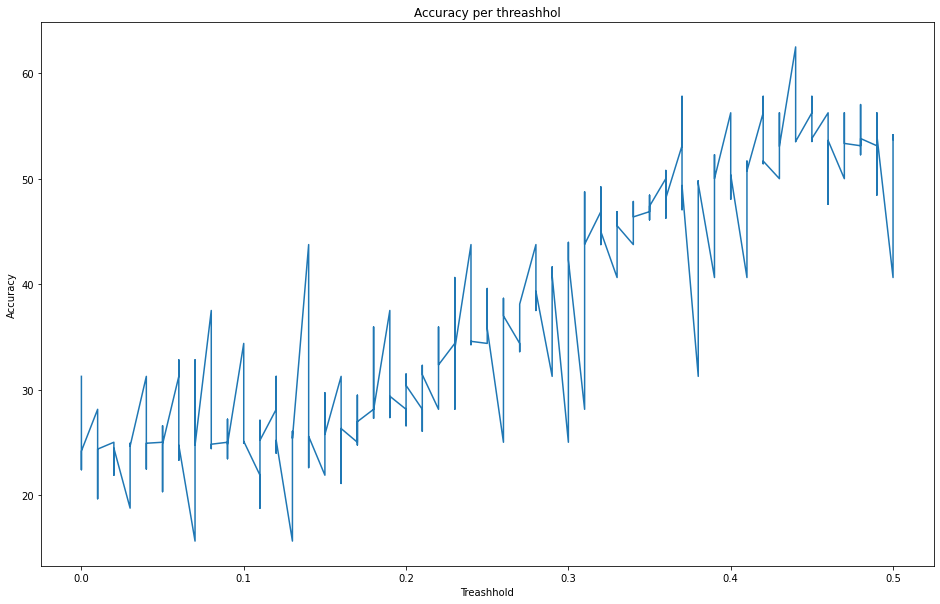

In [33]:
step = np.linspace(0, 5000, 5000)

fig, ax = plt.subplots(figsize=(16,10))
plt.plot(treashhold, percents)
plt.title("Accuracy per threashhol")
plt.xlabel("Treashhold")
plt.ylabel("Accuracy")
plt.show()

# **(ز) ﻣﺤﺎﺳﺒﻪ ﻧﺘﯿﺠﻪ**

In [26]:
data = [[20,73,69,75.3,69,5,83,85,88,84], [ 20,73,69,75.3,69,16,77,75.8,77.7,75.8], [20,73,69,75.3,69,19,74,75,73,78.5]]
 
Group_matches = pd.DataFrame(data, columns=[ 'home_rank','home_goalkeeper','home_defense','home_offense','home_mid',
                                             'away_rank','away_goalkeeper','away_defense','away_offense','away_mid'])
#for (columnName, columnData) in Group_matches.iteritems():
  #Group_matches[columnName] = Group_matches[columnName] /Group_matches[columnName].abs().max()
group_data = Data(Group_matches.to_numpy(), test['result'].to_numpy())
group_dataloader = DataLoader(dataset=group_data, batch_size=batch_size, shuffle=False)
Group_matches

,home_rank,home_goalkeeper,home_defense,home_offense,home_mid,away_rank,away_goalkeeper,away_defense,away_offense,away_mid
0,20,73,69,75.3,69,5,83,85.0,88.0,84.0
1,20,73,69,75.3,69,16,77,75.8,77.7,75.8
2,20,73,69,75.3,69,19,74,75.0,73.0,78.5


In [34]:

for X, y in group_dataloader:     
          outputs = model(X).detach().numpy().reshape(-1)
          print(outputs)
          outputs[outputs<max_arg]=0
          outputs[outputs>(1 - max_arg)]=1
          outputs[(outputs>=max_arg)&(outputs<=(1 - max_arg))]=0.5

if outputs[0]==1 :
  print('England defeats Iran')
elif outputs[0] == 0.5 :
  print('Iran vs England will ends in a tie')
else:
  print('Iran defeats England')

if outputs[1]==1 :
  print('USA defeats Iran')
elif outputs[1] == 0.5 :
  print('Iran vs USA will ends in a tie')
else:
  print('Iran defeats USA')

if outputs[2]==1 :
  print('Walse defeats Iran')
elif outputs[2] == 0.5 :
  print('Iran vs Walse will ends in a tie')
else:
  print('Iran defeats Wales')


[0.9203224  0.5261833  0.51651645]
England defeats Iran
Iran vs USA will ends in a tie
Iran vs Walse will ends in a tie


نتیجه به ما میگوید به احتمال 92 درصد انگلیس از ایران میبرد و آمریکا و ولز به ترتیب احتمال برد 53 و 51 درصد دارند که بنابر کد بخش قبل، هردو با ایران مساوی میکنند.